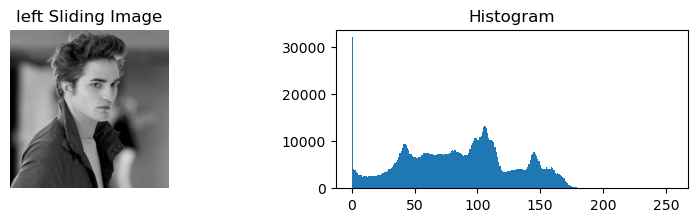

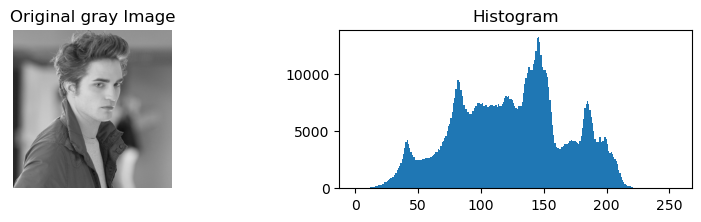

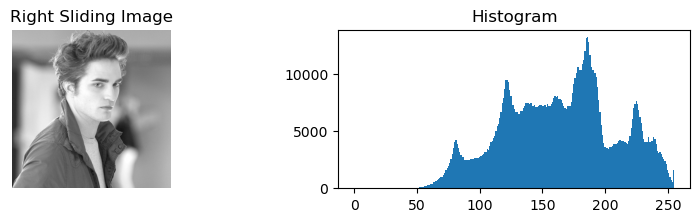

In [46]:
#histogram sliding
import cv2
import matplotlib.pyplot as plt
import numpy as np
image =cv2.imread(r"C:\Users\student\Pictures\cv\actor.jfif")
image =cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)

def histogram_sliding(img, shift):
    fill = np.ones(img.shape, np.uint8) * abs(shift)
    if shift > 0:
        return cv2.add(img, fill)
    else:
        return cv2.subtract(img, fill)

plt.figure(figsize=(10,7))
#shifiting histogram to leftwards
image1 = histogram_sliding(image, -40) 
plt.subplot(3, 2, 1) 
plt.title("left Sliding Image")
plt.imshow(image1,cmap ='gray') 
plt.axis("off")

plt.subplot(3, 2, 2) 
plt.hist(image1.ravel(), bins=256, range=(0, 255)) 
plt.title("Histogram") 
plt.show()

plt.figure(figsize=(10,7))
plt.subplot(3, 2, 3) 
plt.imshow(image,cmap='gray') 
plt.title("Original gray Image")
plt.axis("off")

plt.subplot(3, 2, 4) 
plt.hist(image.ravel(), bins=256, range=(0, 255)) 
plt.title("Histogram") 
plt.show()

plt.figure(figsize=(10,7))
# shifiting histogram to rightwards
image2 = histogram_sliding(image, 40) 
plt.subplot(3, 2, 5) 
plt.imshow(image2,cmap='gray')
plt.title("Right Sliding Image")
plt.axis("off")

plt.subplot(3, 2, 6)
plt.hist(image2.ravel(), bins=256, range=(0, 255)) 
plt.title("Histogram") 
plt.show() 

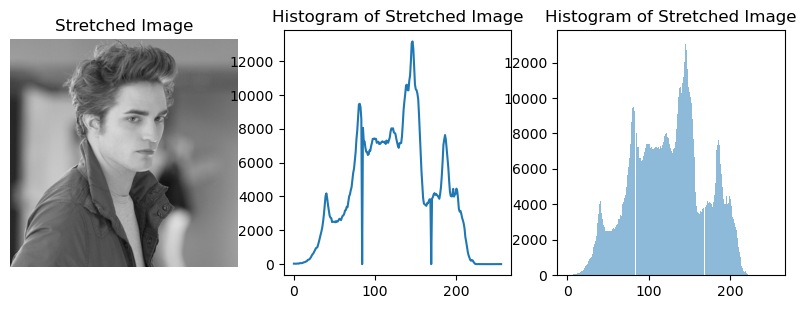

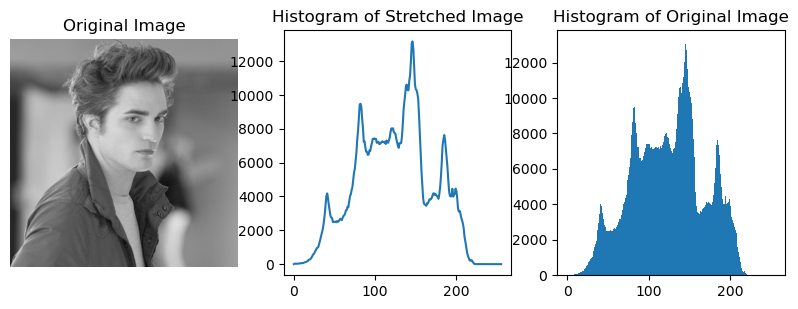

In [63]:
# Function for histogram stretching
def histogram_stretching(img):
    min_pixel = np.min(img)
    max_pixel = np.max(img)
    
    stretched_img = ((img - min_pixel) / (max_pixel - min_pixel)*255)
    
    return np.uint8(stretched_img)

image_stretched = histogram_stretching(image)

plt.figure(figsize =(10,7))

plt.subplot(2, 3, 1)
plt.title("Stretched Image")
plt.imshow(image_stretched, cmap='gray')
plt.axis("off")

plt.subplot(2, 3, 2)
hist = cv2.calcHist([image_stretched], [0], None, [256], [0, 256])
plt.plot(hist)
plt.title("Histogram of Stretched Image")

plt.subplot(2, 3, 3)
plt.hist(image_stretched.ravel(), bins=256, range=(0, 255))
plt.title("Histogram of Stretched Image")
plt.show()


plt.figure(figsize =(10,7))

plt.subplot(2, 3, 4)
plt.imshow(image, cmap='gray')
plt.title("Original Image")
plt.axis("off")


plt.subplot(2, 3, 5)
hist = cv2.calcHist([image], [0], None, [256], [0, 256])
plt.plot(hist)
plt.title("Histogram of Stretched Image")

plt.subplot(2,3, 6)
plt.hist(image.ravel(), bins=256, range=(0, 255))
plt.title("Histogram of Original Image")
plt.show()



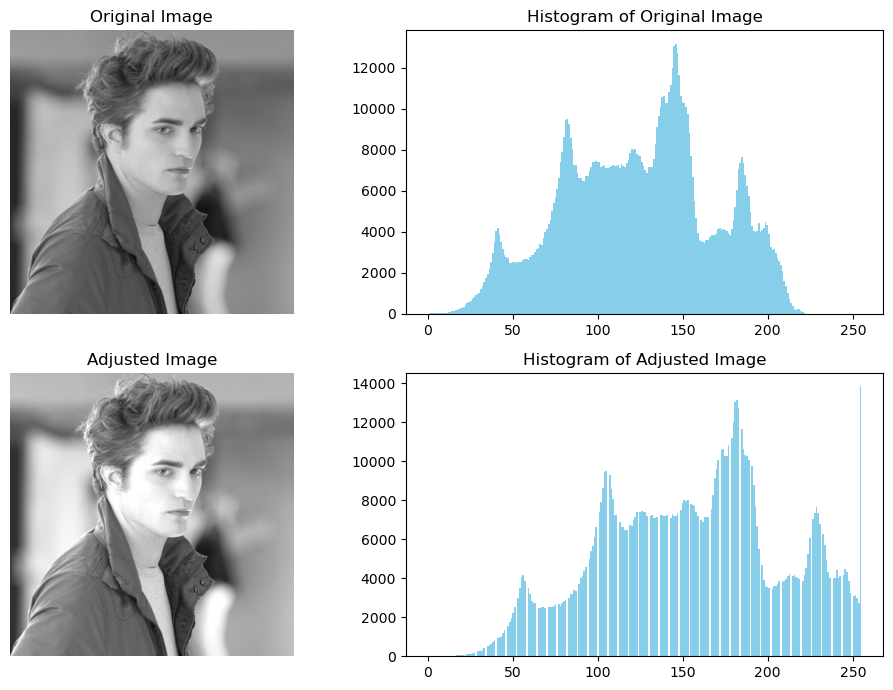

In [77]:
#contrast adjusting

alpha = 1.2 
beta = 7

adjusted_image = cv2.convertScaleAbs(image, alpha=alpha, beta=beta)


plt.figure(figsize=(10, 7))

plt.subplot(2, 2, 1)
plt.imshow(image, cmap='gray')
plt.title("Original Image")
plt.axis("off")


plt.subplot(2, 2, 2)
plt.hist(image.ravel(), bins=256, range=(0, 255),color ='skyblue')
plt.title("Histogram of Original Image")


plt.subplot(2, 2, 3)
plt.imshow(adjusted_image, cmap='gray')
plt.title("Adjusted Image")
plt.axis("off")


plt.subplot(2, 2, 4)
plt.hist(adjusted_image.ravel(), bins=256, range=(0, 255),color ='skyblue')
plt.title("Histogram of Adjusted Image")

plt.tight_layout()
plt.show()


In [90]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
image =cv2.imread(r"C:\Users\student\Pictures\cv\actor.jfif")

height, width, channels = image.shape

blurred_image = np.zeros_like(image)

kernel_size = 7

kernel_radius = kernel_size // 2

for i in range(kernel_radius, height - kernel_radius):

    for j in range(kernel_radius, width - kernel_radius):

        for c in range(channels):

            region = image[i - kernel_radius:i + kernel_radius + 1, j - kernel_radius:j + kernel_radius + 1, c]

            blurred_image[i, j, c] = np.mean(region)

plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)

plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB)) 

plt.title('Original Image')

plt.axis('off')

plt.subplot(1, 2, 2)

plt.imshow(cv2.cvtColor(blurred_image, cv2.COLOR_BGR2RGB)) 

plt.title('Blurred Image (by changing pixel values)')

plt.axis('off')

plt.tight_layout()

plt.show()

 

def plot_histogram(image, ax, title):

    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    colors = ['r', 'g', 'b']

    for i, color in enumerate(colors):

        ax.hist(image_rgb[:, :, i].flatten(), bins=256, color=color, alpha=0.6, label=f'{color.upper()} Channel')

    ax.set_title(title)

    ax.set_xlabel('Pixel Intensity')

    ax.set_ylabel('Frequency')

    ax.legend()

fig, axes = plt.subplots(1, 2, figsize=(10, 6))

plot_histogram(image, axes[0], 'Histogram of Original Image')

plot_histogram(blurred_image, axes[1], 'Histogram of Blurred Image')

plt.tight_layout()

plt.show()

KeyboardInterrupt: 

In [ ]:
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

sharpening_kernel = np.array([[0, -1, 0],

                              [-1, 5, -1],

                              [0, -1, 0]])

sharpened_image = cv2.filter2D(image, -1, sharpening_kernel)

sharpened_image_rgb = cv2.cvtColor(sharpened_image, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)

plt.imshow(image_rgb)

plt.title('Original Image')

plt.axis('off')

plt.subplot(1, 2, 2)

plt.imshow(sharpened_image_rgb) 

plt.axis('off')

plt.tight_layout()

plt.show()

def plot_histogram(image, ax, title):

  

    colors = ['r', 'g', 'b']

    for i, color in enumerate(colors):

        ax.hist(image[:, :, i].flatten(), bins=256, color=color, alpha=0.6, label=f'{color.upper()} Channel')

   

    ax.set_title(title)

    ax.set_xlabel('Pixel Intensity')

    ax.set_ylabel('Frequency')

    ax.legend()

 

fig, axes = plt.subplots(1, 2, figsize=(10, 6))

plot_histogram(image_rgb, axes[0], 'Histogram of Original Image')

plot_histogram(sharpened_image_rgb, axes[1], 'Histogram of Sharpened Image')

plt.tight_layout()

plt.show()

In [ ]:
smoothed_image = cv2.GaussianBlur(image, (10, 7), 0)

smoothed_image_rgb = cv2.cvtColor(smoothed_image, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)

plt.imshow(image_rgb)

plt.title('Original Image')

plt.axis('off')

plt.subplot(1, 2, 2)

plt.imshow(smoothed_image_rgb)

plt.title('Smoothed Image')

plt.axis('off')

 

plt.tight_layout()

plt.show()

def plot_histogram(image, ax, title):

    colors = ['r', 'g', 'b']

    for i, color in enumerate(colors):

        ax.hist(image[:, :, i].flatten(), bins=256, color=color, alpha=0.6, label=f'{color.upper()} Channel')

   

    ax.set_title(title)

    ax.set_xlabel('Pixel Intensity')

    ax.set_ylabel('Frequency')

    ax.legend()

fig, axes = plt.subplots(1, 2, figsize=(10, 6))

plot_histogram(image_rgb, axes[0], 'Histogram of Original Image')

plot_histogram(smoothed_image_rgb, axes[1], 'Histogram of Smoothed Image')

plt.tight_layout()

plt.show()

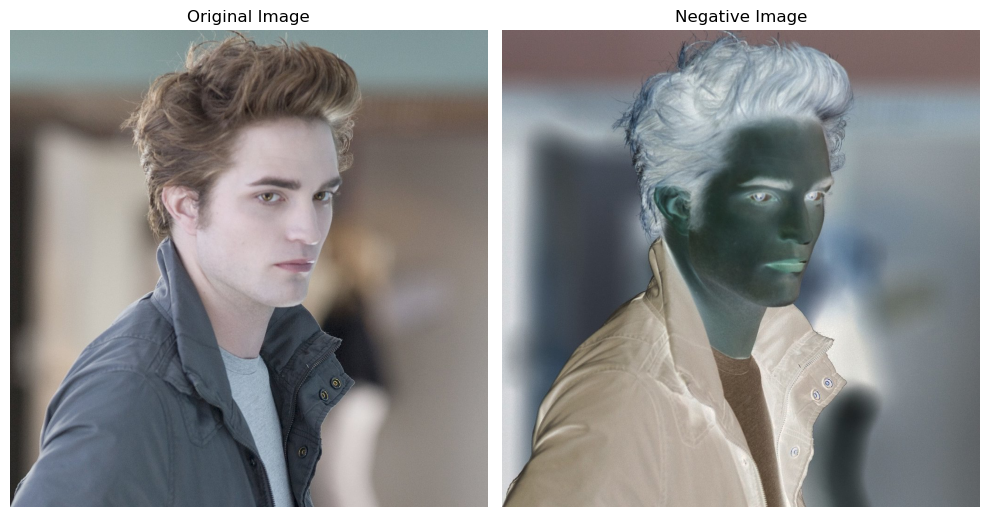

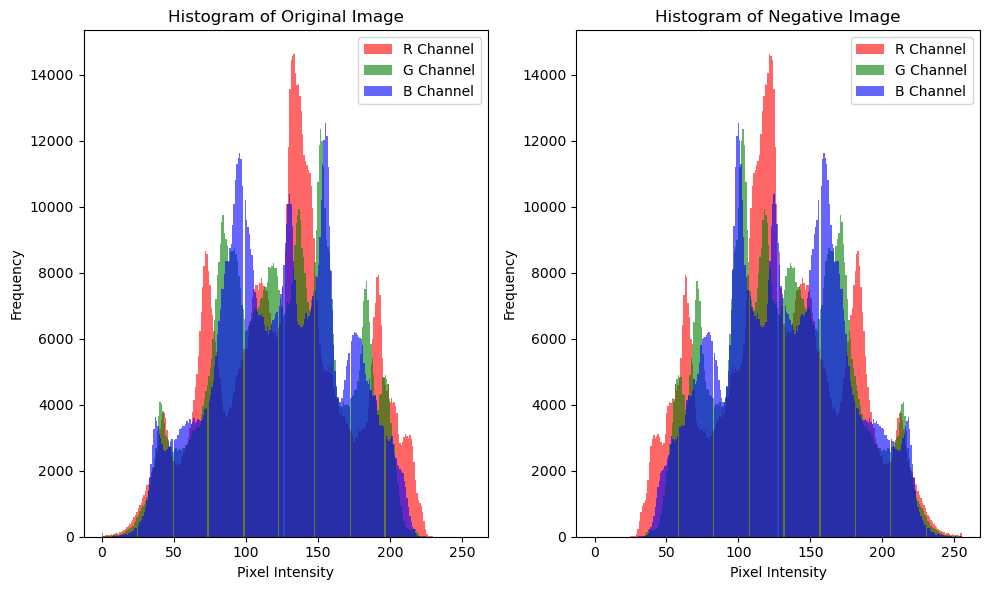

In [91]:
negative_image = 255 - image

negative_image_rgb = cv2.cvtColor(negative_image, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)

plt.imshow(image_rgb)

plt.title('Original Image')

plt.axis('off')

plt.subplot(1, 2, 2)

plt.imshow(negative_image_rgb)

plt.title('Negative Image')

plt.axis('off')

 

plt.tight_layout()

plt.show()

def plot_histogram(image, ax, title):

    colors = ['r', 'g', 'b']

    for i, color in enumerate(colors):

        ax.hist(image[:, :, i].flatten(), bins=256, color=color, alpha=0.6, label=f'{color.upper()} Channel')

   

    ax.set_title(title)

    ax.set_xlabel('Pixel Intensity')

    ax.set_ylabel('Frequency')

    ax.legend()

fig, axes = plt.subplots(1, 2, figsize=(10, 6))

plot_histogram(image_rgb, axes[0], 'Histogram of Original Image')

plot_histogram(negative_image_rgb, axes[1], 'Histogram of Negative Image')

plt.tight_layout()

plt.show()